# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd Yummy Dataset.

**Submit two Jupyter notebooks**, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** (9 sections) indicated below. Notebooks might not be run, please make sure that the **output cells are saved**.

How will we evaluate your submission?

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Mohammed Ammar
**Student ID**:  231082101



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and format of the intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

# 8 Results

Carry out your experiments here, explain your results.

# 9 Conclusions

Your conclusions, suggestions for improvements, etc should go here

In [7]:
pip install mlend

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm

In [9]:
dir='/content/sample_data'
baseDir = download_yummy_small(save_to = dir)
baseDir
os.listdir(baseDir)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


['MLEndYD_images_small', 'MLEndYD_image_attributes_small.csv']

In [10]:
MLENDYD_df = pd.read_csv(dir+'/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


In [11]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/sample_data/yummy/MLEndYD_images_small/


In [12]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Rice


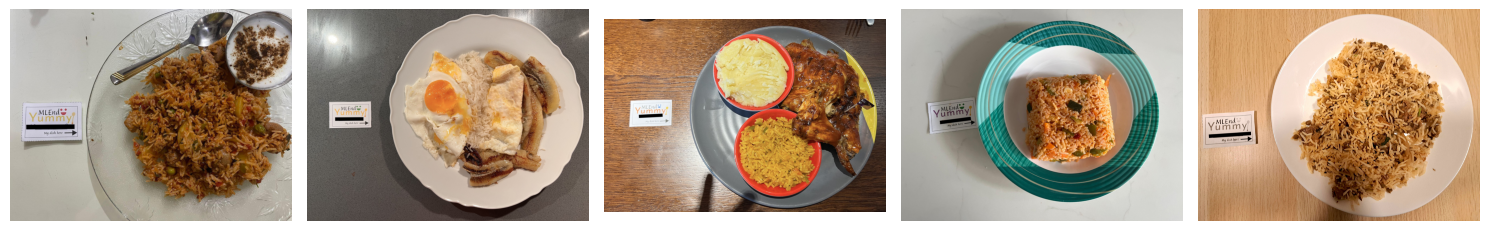

Chips


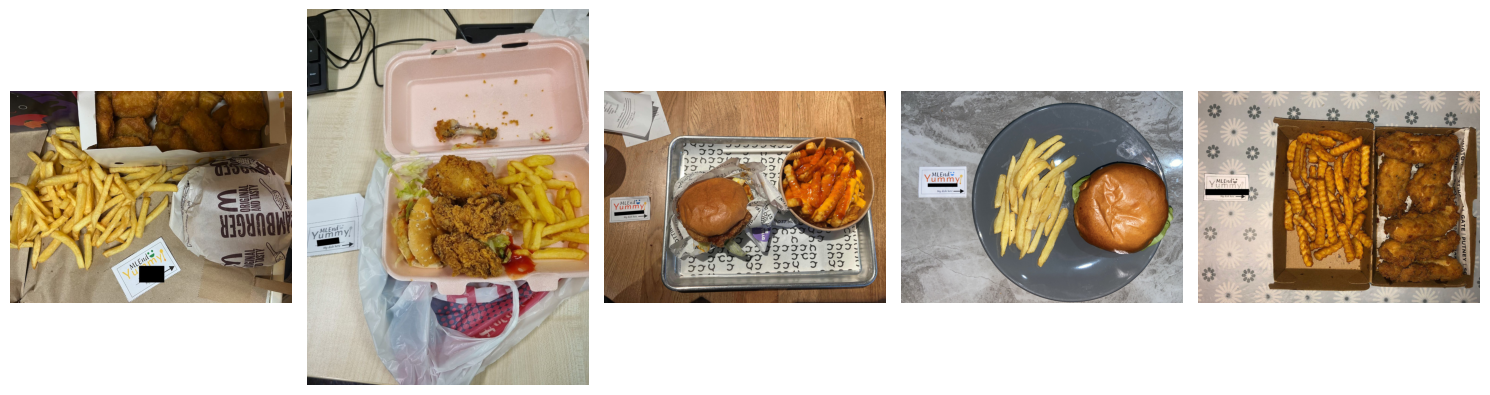

In [13]:
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import image
from skimage import io, color


# Step 2: Preprocess Images
def preprocess_images(images):
    # Convert images to grayscale
    grayscale_images = np.array([color.rgb2gray(img) for img in images])
    return grayscale_images

# Step 3: Extract Features
def extract_features(images):
    # Flatten images to use as features
    features = images.reshape(images.shape[0], -1)
    return features

# Step 4: Create a Pipeline
def create_pipeline(n_clusters):
    steps = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=50)),  # Principal Component Analysis for dimensionality reduction
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
    ]
    return Pipeline(steps)

# Step 5: Visualize Clusters
def visualize_clusters(images, labels, n_clusters):
    for cluster_id in range(n_clusters):
        cluster_samples = images[labels == cluster_id]
        fig, axes = plt.subplots(1, len(cluster_samples), figsize=(10, 4))
        fig.suptitle(f"Cluster {cluster_id}", fontsize=16)
        for i, sample in enumerate(cluster_samples):
            axes[i].imshow(sample, cmap='gray')
            axes[i].axis('off')
        plt.show()

# Main Pipeline
def image_clustering_pipeline(image_folder, n_clusters):
    # Step 1: Load Images
    images = load_images(image_folder)

    # Step 2: Preprocess Images
    preprocessed_images = preprocess_images(images)

    # Step 3: Extract Features
    features = extract_features(preprocessed_images)

    # Step 4: Create a Pipeline
    pipeline = create_pipeline(n_clusters)

    # Step 5: Fit the Pipeline
    pipeline.fit(features)

    # Step 6: Get Cluster Labels
    cluster_labels = pipeline.predict(features)

    # Step 7: Visualize Clusters
    visualize_clusters(preprocessed_images, cluster_labels, n_clusters)

# Example Usage
image_folder = "path/to/your/images"
n_clusters = 3  # Number of clusters
image_clustering_pipeline(image_folder, n_clusters)


NameError: ignored

In [16]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


((70, 200, 200, 3), (29, 200, 200, 3))

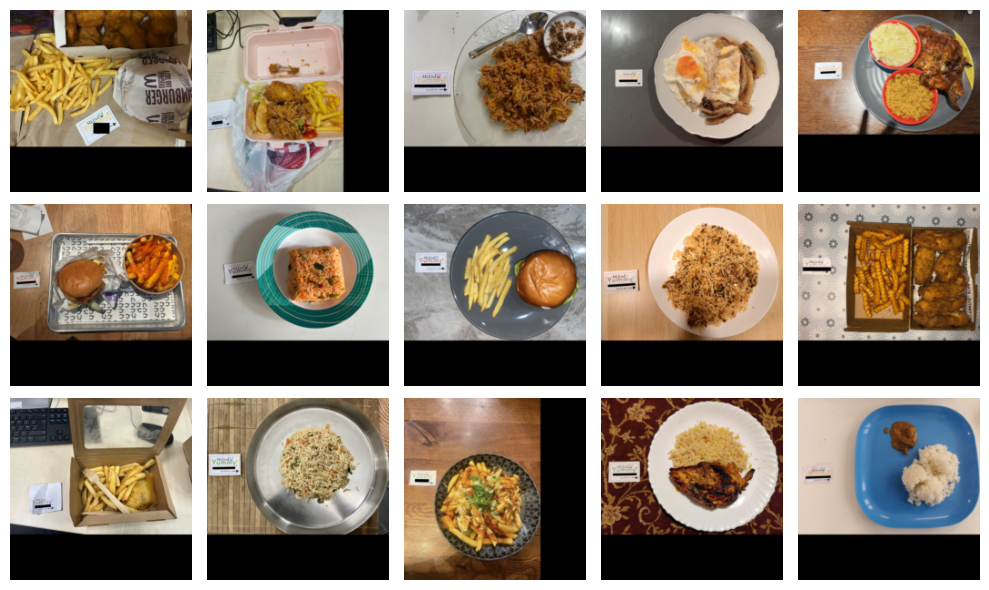

In [17]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

In [18]:
import skimage
from skimage import io, color, feature, filters

def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  #
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def hog_feat(I):
  gray_image = color.rgb2gray(I)

# Extract features using, for example, the Histogram of Oriented Gradients (HOG)
  hog_features, hog_image = feature.hog(gray_image, visualize=True)
  return hog_features.sum()

def lbp_feat(I):
  n_points = 3
  radius = 8*n_points
  lbp_features_r = feature.local_binary_pattern(I[:, :, 0], n_points, radius, method='uniform')
  lbp_features_g = feature.local_binary_pattern(I[:, :, 1], n_points, radius, method='uniform')
  lbp_features_b = feature.local_binary_pattern(I[:, :, 2], n_points, radius, method='uniform')

# Flatten the 2D arrays into 1D arrays
  lbp_features_r_flat = lbp_features_r.flatten()
  lbp_features_g_flat = lbp_features_g.flatten()
  lbp_features_b_flat = lbp_features_b.flatten()
  return lbp_features_r_flat,lbp_features_g_flat,lbp_features_b_flat

def gabor_feat(I):
    frequency = 0.6
    theta = 1.0
    sigma_x = 1.0
    sigma_y = 0.5
    gray_image = color.rgb2gray(I)
    filtered_real, _ = filters.gabor(gray_image, frequency, theta=theta, sigma_x=sigma_x, sigma_y=sigma_y)
    return filtered_real.sum()

In [19]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2 = hog_feat(I)
  f3 = gabor_feat(I)
  X_train_f.append([f1,f2,f3])
X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2 = hog_feat(I)
  f3 = gabor_feat(I)
  X_test_f.append([f1,f2,f3])


In [20]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((70, 3), (29, 3))

In [21]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_f)

In [22]:
mean_values = np.mean(X_train_f, axis=0)
std_values = np.std(X_train_f, axis=0)
zero_std_mask = std_values == 0
std_values[zero_std_mask] = 1

norm_xt = (X_train - mean_values) / std_values

In [23]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

In [24]:
X_train_fn[0]

array([ 1.09698589,  0.18362257, -0.3791076 ])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

model = LinearSVC(C=2)
modela = RandomForestClassifier()
modelb =  KNeighborsClassifier(2)
modelc = KMeans(2)
modeld = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
model.fit(X_train_fn, Y_train)
#X_train_f.flatten().shape

LinearSVC(C=2)

In [35]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6285714285714286
Test  Accuracy:	 0.5172413793103449
